In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.cluster import DBSCAN

iris = datasets.load_iris()
X = iris.data[:, :4] # #表示我们只取特征空间中的4个维度
print(X.shape)

(150, 4)


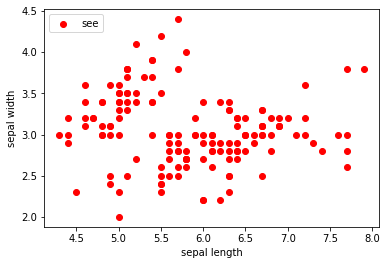

In [3]:
# 绘制数据分布图
plt.scatter(X[:, 0], X[:, 1], c="red", marker='o', label='see')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(loc=2)
plt.show()

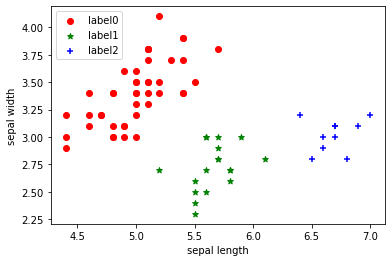

In [17]:
# 需要两个参数：ε (eps) 和形成高密度区域所需要的最少点数 (minPts)
# 它由一个任意未被访问的点开始，然后探索这个点的 ε-邻域，如果 ε-邻域里有足够的点，
# 则建立一个新的聚类，否则这个点被标签为杂音。注意这个点之后可能被发现在其它点的 ε-邻域里，
# 而该 ε-邻域可能有足够的点，届时这个点会被加入该聚类中。
dbscan = DBSCAN(eps=0.4, min_samples=9)
dbscan.fit(X)
label_pred = dbscan.labels_

# 绘制k-means结果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.scatter(x0[:, 0], x0[:, 1], c="red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c="green", marker='*', label='label1')
plt.scatter(x2[:, 0], x2[:, 1], c="blue", marker='+', label='label2')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(loc=2)
plt.show()

In [ ]:
###################  AGNES
#首先将每个对象作为一个簇，然后合并这些原子簇为越来越大的簇，直到某个终结条件被满足

In [22]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

In [26]:
iris = datasets.load_iris()
irisdata = iris.data
clustering = AgglomerativeClustering(linkage='ward', n_clusters=4)

res = clustering.fit(irisdata)

print ("各个簇的样本数目：")
print (pd.Series(clustering.labels_).value_counts())
print ("聚类结果：")
print (confusion_matrix(iris.target, clustering.labels_))

各个簇的样本数目：
1    50
2    38
0    36
3    26
dtype: int64
聚类结果：
[[ 0 50  0  0]
 [ 1  0 24 25]
 [35  0 14  1]
 [ 0  0  0  0]]


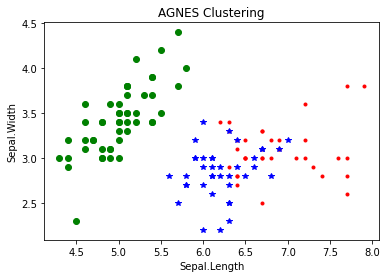

In [27]:
plt.figure()
d0 = irisdata[clustering.labels_ == 0]
plt.plot(d0[:, 0], d0[:, 1], 'r.')
d1 = irisdata[clustering.labels_ == 1]
plt.plot(d1[:, 0], d1[:, 1], 'go')
d2 = irisdata[clustering.labels_ == 2]
plt.plot(d2[:, 0], d2[:, 1], 'b*')
plt.xlabel("Sepal.Length")
plt.ylabel("Sepal.Width")
plt.title("AGNES Clustering")
plt.show()